In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)

# Basic Graph

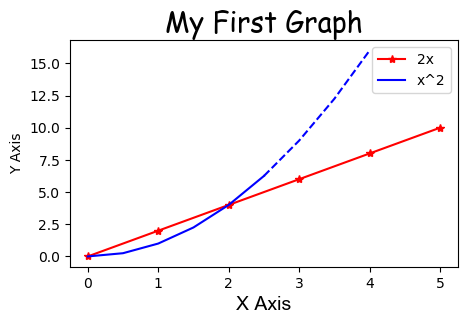

In [2]:
x = [0,1,2,3,4,5]
y = [0,2,4,6,8,10]

plt.figure(figsize = (5,3), dpi = 100)
#plt.plot(x,y, label = '2x', color = 'red', linewidth = 1, linestyle = '--', marker = '.', markersize = 10, markeredgecolor = 'blue')

# use shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x, y, 'r*-', label = '2x')


# Line Number Two
x2 = np.arange(0, 4.5, 0.5)
plt.plot(x2[:6], x2[:6]**2, 'b', label = 'x^2')
plt.plot(x2[5:], x2[5:]**2, 'b--')

plt.title("My First Graph", fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel("X Axis", fontdict = {'fontname': 'Arial', 'fontsize': 14})
plt.ylabel("Y Axis")

plt.xticks([0,1,2,3,4,5])
#plt.yticks([0,2,4,6,8,10])

plt.legend()

plt.savefig('./figs/myfirstgraph.png', dpi = 300)
plt.show()

# Bar Chart

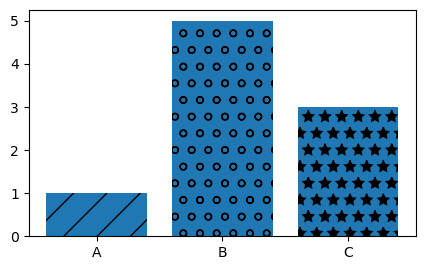

In [3]:
labels = ['A', 'B', 'C']
values = [1,5,3]

plt.figure(figsize = (5,3), dpi = 100)
bars = plt.bar(labels, values)

patterns = ['/', 'o', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
# bars[0].set_hatch('/')
# bars[1].set_hatch('o')
# bars[2].set_hatch('*')

plt.savefig('./figs/myfirstbar.png')
plt.show()

# Line Graph

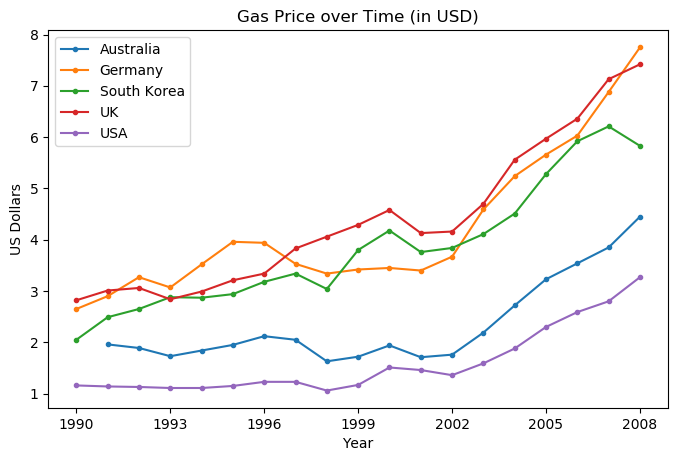

In [4]:
gas = pd.read_csv('./data/gas_prices.csv')

plt.figure(figsize = (8,5), dpi = 100)

plt.title('Gas Price over Time (in USD)')

# show country one by one
# plt.plot(gas.Year, gas.USA, 'b.-', label = 'United States')
# plt.plot(gas.Year, gas.Canada, 'r.-',label = 'Canada')
# plt.plot(gas['Year'], gas['South Korea'], 'g.-',label = 'South Korea')
# plt.plot(gas['Year'], gas['Australia'], 'y.-',label = 'Australia')

# show all countries
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], '.-', label = country)

countries_to_look_at = ['USA', 'South Korea', 'Australia', 'Germany', 'UK']

for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas['Year'], gas[country], '.-',label = country)

    
plt.xticks(gas.Year[::3])
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()

plt.savefig('./figs/gas_price.png', dpi = 100)
plt.show()

# Load Fifa Data

In [5]:
fifa = pd.read_csv('~/work2/src/matplotlib_tutorial/fifa_data.csv')
fifa.head()

FileNotFoundError: [Errno 2] File C:\Users\wenyuc/work2/src/matplotlib_tutorial/fifa_data.csv does not exist: 'C:\\Users\\wenyuc/work2/src/matplotlib_tutorial/fifa_data.csv'

## Histograms

In [ ]:
plt.figure(figsize = (8, 5), dpi = 100)
bins = [40, 50, 60, 70, 80, 90, 100]
plt.hist(fifa.Overall, bins = bins)
plt.xticks(bins)
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Skill Level in Fifa')
plt.show()

## Pie Charts

In [ ]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left', :].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == "Right", :].count()[0]

labels = ['Left', 'Right']
colors = ['red', 'green']
plt.title('Foot Preference of Fifa Players')
plt.pie([left, right], labels = labels, colors = colors, autopct = "%.2f %%")
plt.legend()
plt.show()

In [ ]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]
fifa.Weight[0]

In [ ]:
light = fifa.loc[fifa.Weight < 125,:].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150), :].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175), :].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200), :].count()[0]
heavy = fifa.loc[fifa.Weight >= 200,:].count()[0]


weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Above 200']

plt.figure(figsize = (16,9), dpi = 100)
plt.style.use('ggplot')

explode = [.4, .2, 0, 0, .4]
plt.pie(weights, labels = labels, autopct= '%.2f %%', pctdistance = 0.8, explode = explode)
plt.title ('Weight Distribution of Fifa Players (in Lbs)')
plt.legend()
plt.show()

In [ ]:
fifa.shape

In [ ]:
plt.style.use('default')
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
new_england = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([barcelona, madrid, new_england], labels = labels, patch_artist = True, medianprops = {'linewidth': 2})
for box in boxes['boxes']:
    # set edge color
    box.set(color = 'red', linewidth = 2)
    
    # set fill color
    box.set(facecolor = 'blue')
    
plt.title("Professional Soccer Team Comparison")
plt.ylabel("Fifa Overall Rating")
plt.show()